In [2]:
import requests
import json 
from pprint import pprint 
import pandas as pd 
import numpy as np 
from pathlib import Path
from IPython.display import clear_output 
import matplotlib.pyplot as plt 

In [23]:
# Import and read csv
victime_of_crime = pd.read_csv('victime_of_crime.csv',index_col=0)
#Combine the data into a single DataFrame
victime_of_crime_df=pd.DataFrame(victime_of_crime)
victime_of_crime_df.head(100)


,ReportedYear,Category,MCI_Category,Sex,AgeCohort,Age groups,Count,ObjectId,Average income,Median
Index_,,,,,,,,,,
224,2016,Crimes Against the Person,Assault,F,Adult,18-24,3,174,"$25,503.00","$12,800.00"
225,2016,Crimes Against the Person,Assault,F,Adult,25-34,14,175,"$88,607.00","$39,700.00"
226,2016,Crimes Against the Person,Assault,F,Adult,35-44,5,176,"$110,621.00","$53,200.00"
227,2016,Crimes Against the Person,Auto Theft,F,Adult,45-54,6,177,"$135,756.00","$53,600.00"
229,2016,Crimes Against the Person,Auto Theft,M,Adult,18-24,3,179,"$25,503.00","$12,800.00"
...,...,...,...,...,...,...,...,...,...,...
855,2021,Crimes Against the Person,Break and Enter,F,Adult,25-34,16,925,"$115,075.00","$43,900.00"
856,2021,Crimes Against the Person,Assault,F,Adult,35-44,4,926,"$132,291.00","$57,500.00"
857,2021,Crimes Against the Person,Assault,F,Adult,45-54,1,927,"$137,436.00","$55,300.00"


In [24]:
new_df = victim_of_crime[["ReportedYear","MCI_Category","Age groups","Count"]]
print(new_df)
crime_list = victim_of_crime["MCI_Category"].unique()
age_list = victim_of_crime["Age groups"].unique()
reportedyear_list = victim_of_crime["ReportedYear"].unique()
print(reportedyear_list)
count = []

for i in reportedyear_list:
    new_per_df = new_df.loc[new_df["ReportedYear"] == i]
    for j in crime_list:
        new_per_df_1 = new_per_df.loc[new_df["MCI_Category"] == j]
        for k in age_list:
            new_per_df_2 = new_per_df_1.loc[new_df["Age groups"] == k]
            count.append(sum(list(new_per_df_2["Count"])))
print(count)
print(len(count))
print(count[28])


    ReportedYear     MCI_Category Age groups  Count
0           2016          Assault      18-24      3
1           2016          Assault      25-34     14
2           2016          Assault      35-44      5
3           2016       Auto Theft      45-54      6
4           2016       Auto Theft      18-24      3
..           ...              ...        ...    ...
90          2021  Break and Enter      25-34     16
91          2021          Assault      35-44      4
92          2021          Assault      45-54      1
93          2021          Assault      55-64      3
94          2021          Assault        65+      7

[95 rows x 4 columns]
[2016 2021]
[2799, 1954, 2675, 2291, 763, 721, 779, 3, 33, 26, 19, 5, 1, 0, 11, 13, 13, 1, 0, 0, 0, 0, 2008, 1, 0, 485, 0, 0, 2385, 4548, 1638, 1319, 1709, 562, 299, 0, 0, 0, 0, 0, 0, 0, 29, 16, 0, 3, 0, 8, 246, 5, 5, 1579, 999, 0, 435, 0]
56
2385


('18-24', '25-34', '35-44', '45-54', '55-64', '65+', '<12')
[[2799, 1954, 2675, 2291, 763, 721, 779], [3, 33, 26, 19, 5, 1, 0], [11, 13, 13, 1, 0, 0, 0], [0, 2008, 1, 0, 485, 0, 0]]
[[2385, 4548, 1638, 1319, 1709, 562, 299], [0, 0, 0, 0, 0, 0, 0], [29, 16, 0, 3, 0, 8, 246], [5, 5, 1579, 999, 0, 435, 0]]
{'Assault': (2799, 1954, 2675, 2291, 763, 721, 779), 'Auto Theft': (3, 33, 26, 19, 5, 1, 0), 'Break and Enter': (11, 13, 13, 1, 0, 0, 0), 'Robbery': (0, 2008, 1, 0, 485, 0, 0)}
{'Assault': (2385, 4548, 1638, 1319, 1709, 562, 299), 'Auto Theft': (0, 0, 0, 0, 0, 0, 0), 'Break and Enter': (29, 16, 0, 3, 0, 8, 246), 'Robbery': (5, 5, 1579, 999, 0, 435, 0)}


(0.0, 3000.0)

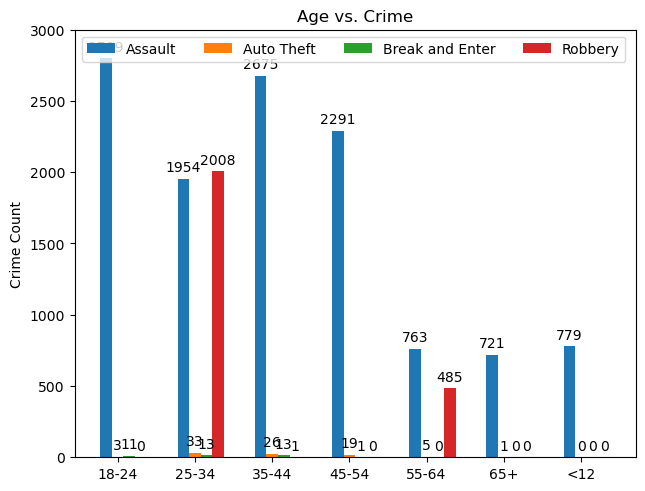

In [27]:
x_age = tuple(victim_of_crime["Age groups"].unique())
crime_type = list(victim_of_crime["MCI_Category"].unique())
print(x_age)
y_dict_2016 = {}
y_dict_2021 = {}
count_list_2016 = []
count_list_2021 = []

j = 0
for i in range(0,int(len(count)/2),7):
    count_list_2016.append(count[i:i+7])
for i in range(int(len(count)/2),len(count),7):
    count_list_2021.append(count[i:i+7])
print(count_list_2016)
print(count_list_2021)

for i in crime_type:
    y_dict_2016[i] = tuple(count_list_2016[j])
    y_dict_2021[i] = tuple(count_list_2021[j])
    j += 1
print(y_dict_2016)
print(y_dict_2021)

x = np.arange(len(x_age))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in y_dict_2016.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Crime Count')
ax.set_title('Age vs. Crime')
ax.set_xticks(x + width, x_age)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 3000)

plt.show()

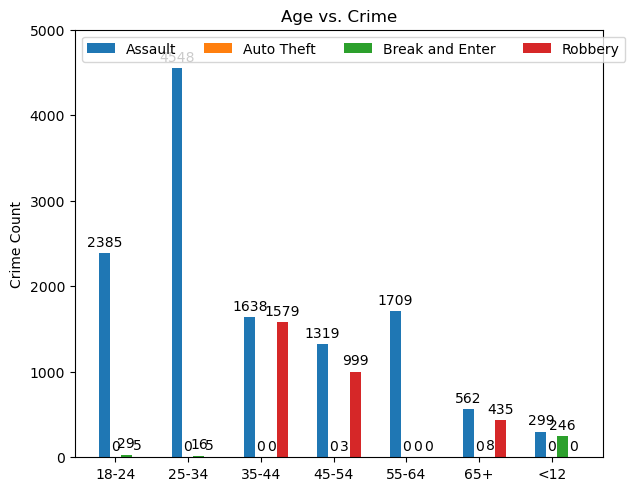

In [26]:
x = np.arange(len(x_age))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in y_dict_2021.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Crime Count')
ax.set_title('Age vs. Crime')
ax.set_xticks(x + width, x_age)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 5000)

plt.show()


In [ ]:
#Analyst Crime_vs_Age_2016:
From the age group under 12 was the victim of  assult
From the age group 18-24 was the main victim of assult and break and enter.
From the age group 25-34 was the main victim of assult and robbery.
From the age group 35-44 was the main victim of assult and auto theft.
From the age group 45-54 was the main victim of assult and auto theft
From the age group 55-64 was the main victim of assult and robbery
From the age group 65+ was the main victim of assult.
During the 2016 the crime type of assult was commited higher compared to other type of crimes.
Also, the victim of assult was ubiqitous of all the group of age and the victime of that was higher 
for young aldult as 18 to 24 years old.
#Analyst Crime_vs_Age_2021:
From the age group under 12 was the victim of  assult, break and enter
From the age group 18-24 was the main victim of assult, break and enter.
From the age group 25-34 was the main victim of assult, break and enter.
From the age group 35-44 was the main victim of assult and robbery.
From the age group 45-54 was the main victim of assult and robbery
From the age group 55-64 was the main victim of assult.
From the age group 65+ was the main victim of assult robbery.
During the 2021 the crime type of assult, break and enter was commited higher compared to other type of crimes.
Moreover, the robbery crime was presented higher compared to 2016 and was popular on the group of age 35+.
We all experienced the Covid-19 pandemic from 2019 to 2021 so the robbery crime was incresed higher of those years. 
